<a href="https://colab.research.google.com/github/raphaelp-silva/deep_learning_com_pytorch_e_python/blob/main/Projeto_6_Classifica%C3%A7%C3%A3o_multiclasse_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 6: Classificação multiclasse iris

## Etapa 1: Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
torch.__version__

'2.5.1+cu124'

## Etapa 2: Base de dados

In [2]:
np.random.seed(123)
torch.manual_seed(123)

In [3]:
base = pd.read_csv('/content/iris.csv')

In [4]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='class', ylabel='count'>

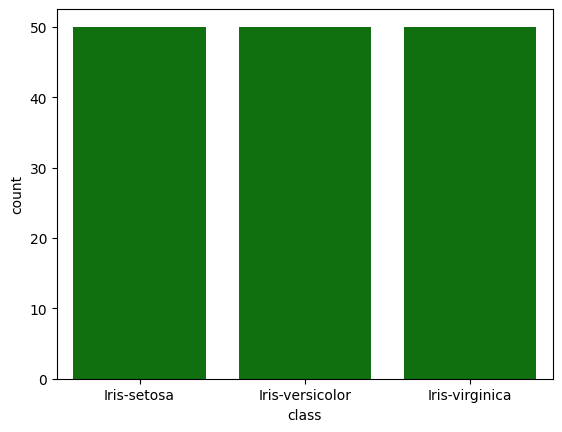

In [14]:
sns.countplot(x = base['class'], color = 'green')

In [16]:
# criando uma variável para armazenar os predizores e uma variável para armazenar a clase:
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [19]:
previsores.shape # 150 registros e 4 colunas

(150, 4)

In [20]:
classe.shape # 150 registros

(150,)

In [21]:
np.unique(base['class']) # varificando os valores únicos presente na classe.

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
# necessário a conversão da classe pois está no formato string e vamos utilizar numérico:
encoder = LabelEncoder()
classe = encoder.fit_transform(classe)

In [23]:
np.unique(classe)

array([0, 1, 2])

In [24]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

In [26]:
previsores_treinamento.shape

(112, 4)

In [27]:
classe_treinamento.shape

(112,)

In [28]:
previsores_teste.shape

(38, 4)

In [29]:
classe_teste.shape

(38,)

In [30]:
type(previsores_treinamento)

numpy.ndarray

In [32]:
previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)
classe_treinamento = torch.tensor(classe_treinamento, dtype = torch.long)

<ipython-input-32-9be96c796b17>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  previsores_treinamento = torch.tensor(previsores_treinamento, dtype = torch.float)


In [33]:
type(previsores_treinamento)

torch.Tensor

In [34]:
type(classe_treinamento)

torch.Tensor

## Etapa 3: Construção do modelo

In [35]:
# estrutura da rede neural 4 -> 4 -> 4 -> 3:
classificador = nn.Sequential(
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 3) #quando trabalhamos com mais de uma classe, não utilizamos função de ativação após a ultima camada. Utilizaremos a funcao softmax que retorna uma probabilidade para cada classe(aplicado no proximo passo)
)

In [36]:
criterion = nn.CrossEntropyLoss() #Calculo do erro. Utilizando esta opcao pois é a mais recomendada para quando se tem mais classes
optimizer = optim.Adam(classificador.parameters(), lr = 0.001, weight_decay = 0.0001)

In [38]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

## Etapa 4: Treinamento do modelo

In [39]:
for epoch in range(2000):
  running_loss = 0.
  running_accuracy = 0.

  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad() #zerando os predizores para o modelo nao ter os valores antigos da classe atual

    outputs = classificador.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    outputs = F.softmax(outputs)
    top_p, top_class = outputs.topk(k = 1, dim = 1) # k = 1 indica que queremos pegar a classe com maior probabilidade // dim=1 indica que queremos pegar por coluna (a que tem maior valor de probabilidade)
    equals = top_class == labels.view(*top_class.shape)
    running_accuracy += torch.mean(equals.type(torch.float)) #somando os valores encontrados do equals para verificar se a previsao bate com o que se encontra na base de dados
    optimizer.step() #atualizando os pesos
    running_loss += loss.item()
  print(f'Época {epoch+1:3d}: perda {running_loss / len(train_loader):.5f} - accuracy {running_accuracy / len(train_loader):.5f}')


<ipython-input-39-874410530d6d>:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(outputs)


Época   1: perda 1.10335 - accuracy 0.35000
Época   2: perda 1.10296 - accuracy 0.35000
Época   3: perda 1.09251 - accuracy 0.41667
Época   4: perda 1.09441 - accuracy 0.38333
Época   5: perda 1.09427 - accuracy 0.38333
Época   6: perda 1.09410 - accuracy 0.38333
Época   7: perda 1.10717 - accuracy 0.35000
Época   8: perda 1.10192 - accuracy 0.35000
Época   9: perda 1.09412 - accuracy 0.38333
Época  10: perda 1.10596 - accuracy 0.35000
Época  11: perda 1.09790 - accuracy 0.38333
Época  12: perda 1.09364 - accuracy 0.38333
Época  13: perda 1.10490 - accuracy 0.35000
Época  14: perda 1.10084 - accuracy 0.35000
Época  15: perda 1.09343 - accuracy 0.38333
Época  16: perda 1.10080 - accuracy 0.35000
Época  17: perda 1.08956 - accuracy 0.41667
Época  18: perda 1.10382 - accuracy 0.35000
Época  19: perda 1.09338 - accuracy 0.38333
Época  20: perda 1.09339 - accuracy 0.38333
Época  21: perda 1.09605 - accuracy 0.38333
Época  22: perda 1.09588 - accuracy 0.38333
Época  23: perda 1.09324 - accur

## Etapa 5: Avaliação do modelo

In [40]:
classificador.eval() # colocando o modelo em modo avaliação

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
)

In [41]:
# convertendo para o formato pytorch:
previsores_teste = torch.tensor(previsores_teste, dtype = torch.float)

In [43]:
previsoes = classificador(previsores_teste)
previsores

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [44]:
# transformando os valores para formato probabilidade:
F.softmax(previsoes)

<ipython-input-44-df2270a8c9c4>:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(previsoes)


tensor([[0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.3054, 0.3770, 0.3176],
        [0.305

In [45]:
previsoes = [np.argmax(t) for t in previsoes.detach().numpy()] # pegando apenas os valores de previsoes com a maior probabilidade (pegando o maior dos 3 valores)

In [46]:
previsoes

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [48]:
# criando a matriz de confusao:
matriz = confusion_matrix(previsoes, classe_teste)
matriz

array([[ 0,  0,  0],
       [16,  8, 14],
       [ 0,  0,  0]])

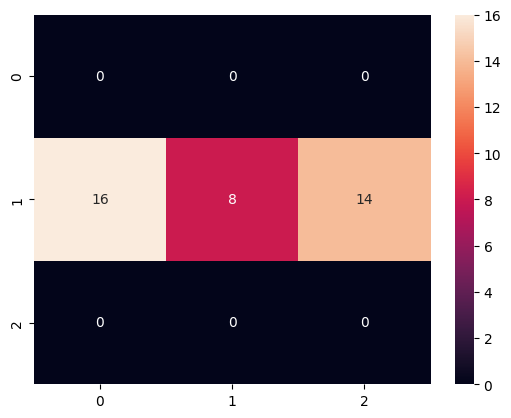

In [50]:
sns.heatmap(matriz, annot = True);